# Equal Variance Model

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm


In [3]:
experiments = 100
observers = ["Positive", "Neutral", "False"]
criterions = [-1, 0, 1]
d_prime = 1 

In [4]:
def guassian_generate(criterion, sigma):
    d_prime = 1 
    
    trials = 50
    stimulus = np.random.normal(loc=d_prime, scale=sigma, size=trials)
    nostimulus = np.random.normal(loc=0, scale=1, size=trials)

    yes = np.sum(stimulus > criterion)
    false_yes = np.sum(nostimulus > criterion)


    truepositive = yes / trials
    falsepositive = false_yes/ trials

    return truepositive, falsepositive

In [5]:
def d_estimate(truepositive, falsepositive):
    
    truepositive= np.clip(truepositive, 0.01, 0.99)
    falsepositive = np.clip(falsepositive, 0.01, 0.99)
    d = norm.ppf(truepositive) - norm.ppf(falsepositive)
    #print(d)
    return d

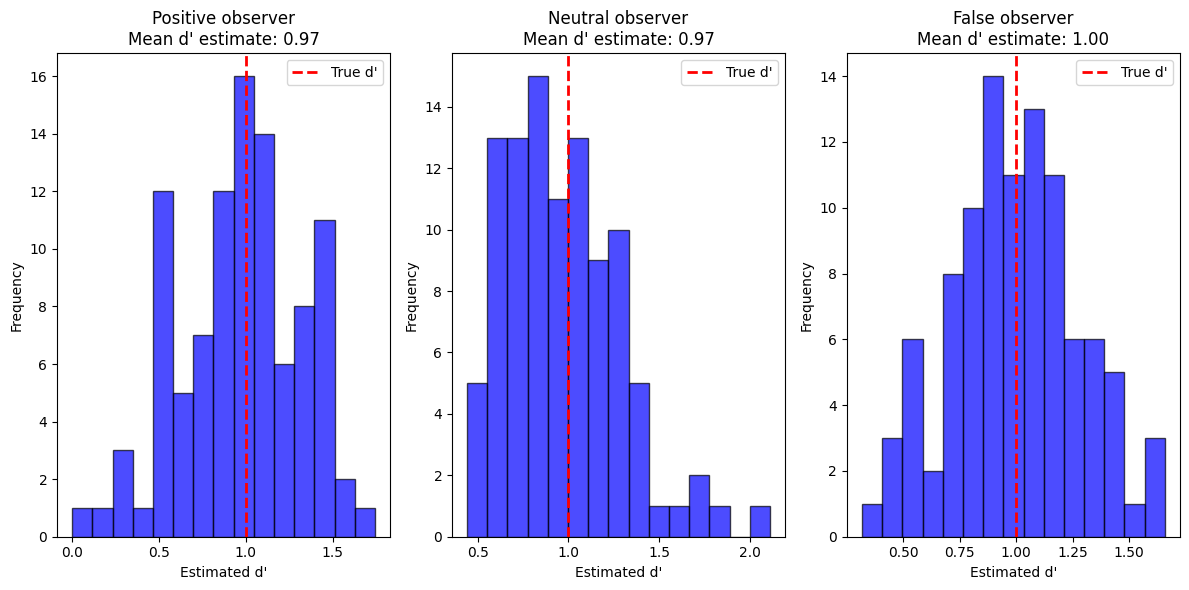

In [6]:
d_prime_estimates = {obs: [] for obs in observers}  # Store d' estimates for each observer

for obs,criterion in zip(observers,criterions):
    for exp in range(experiments):
        tp, fp = guassian_generate(criterion, sigma = 1)
        estimate = d_estimate(tp, fp)
        d_prime_estimates[obs].append(estimate)
# Plot histograms of d' estimates for each observer
plt.figure(figsize=(12, 6))

for i, obs in enumerate(observers):
    plt.subplot(1, 3, i + 1)
    plt.hist(d_prime_estimates[obs], bins=15, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'{obs} observer\nMean d\' estimate: {np.mean(d_prime_estimates[obs]):.2f}')
    plt.axvline(d_prime, color='red', linestyle='dashed', linewidth=2, label='True d\'')
    plt.xlabel('Estimated d\'')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


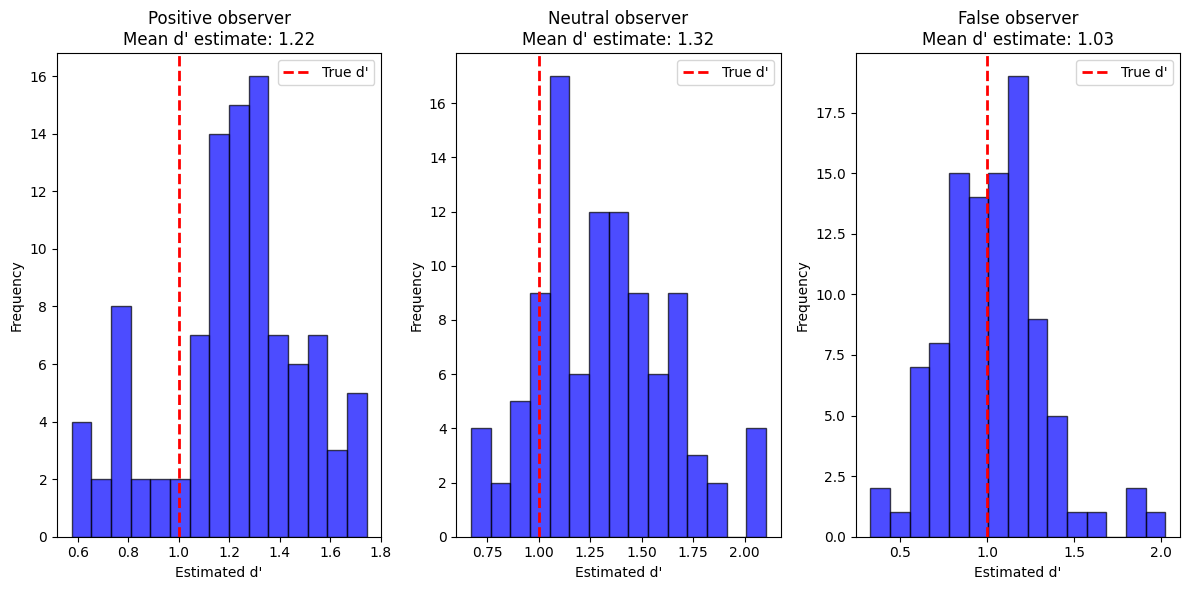

In [7]:
d_prime_estimates = {obs: [] for obs in observers}  # Store d' estimates for each observer

for obs,criterion in zip(observers,criterions):
    for exp in range(experiments):
        tp, fp = guassian_generate(criterion, sigma = 0.8)
        estimate = d_estimate(tp, fp)
        d_prime_estimates[obs].append(estimate)
# Plot histograms of d' estimates for each observer
plt.figure(figsize=(12, 6))

for i, obs in enumerate(observers):
    plt.subplot(1, 3, i + 1)
    plt.hist(d_prime_estimates[obs], bins=15, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'{obs} observer\nMean d\' estimate: {np.mean(d_prime_estimates[obs]):.2f}')
    plt.axvline(d_prime, color='red', linestyle='dashed', linewidth=2, label='True d\'')
    plt.xlabel('Estimated d\'')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


In [8]:
directory_path = Path('data/generated_rating')
criterions = [1, 2, 2, 4, 4, 6, 6, 8]
merged_df = pd.DataFrame()
# Iterate through all CSV files in the directory
for file in directory_path.rglob('*.csv'):
    # Load the CSV data into a DataFrame
    data = pd.read_csv(file)
    
    merged_df = pd.concat([merged_df, data], ignore_index=True)

rating_counts = merged_df.groupby(['ImageName', 'Rating']).size().unstack(fill_value=0)
#print(rating_counts)

image_names = rating_counts.index.tolist()

for idx in range(0, len(image_names) - 1, 1):
    image1 = image_names[idx]
    image2 = image_names[idx + 1]
    c = criterions[idx]
    
    image1_ratings = rating_counts.loc[image1]
    image2_ratings = rating_counts.loc[image2]
    
    print(f"Pair: {image1} & {image2}")
    no_signal = image1_ratings.sum()
    signal = image2_ratings.sum()

    false_yes = image1_ratings[image1_ratings.index > c].sum()
    yes = image2_ratings[image2_ratings.index > c].sum()  

    tp = yes / signal
    fp = false_yes/ no_signal
    print(norm.ppf(tp) - norm.ppf(fp))

merged_df['Category'] = merged_df['Rating'].apply(lambda x: 'No' if x <= 4 else 'Yes')
category_counts = merged_df.groupby(['ImageName', 'Category']).size().unstack(fill_value=0)

merged_df['ImageGroup'] = merged_df['ImageName'].apply(lambda x: 'No' if int(x[0]) <= 4 else 'Yes')
imagegroup_counts = merged_df['ImageGroup'].value_counts()
print(rating_counts)
    
    

Pair: 0.jpg & 1.jpg
0.4514819192557149
Pair: 1.jpg & 2.jpg
1.181517515818292
Pair: 2.jpg & 3.jpg
0.9747811044726693
Pair: 3.jpg & 4.jpg
0.9908399325326416
Pair: 4.jpg & 5.jpg
0.41240835228332706
Pair: 5.jpg & 6.jpg
0.9539881511273555
Pair: 6.jpg & 7.jpg
1.2017591846582385
Pair: 7.jpg & 8.jpg
0.9434308678772108
Rating      1   2   3   4   5   6   7   8   9
ImageName                                    
0.jpg      18   5   1   0   0   0   0   0   0
1.jpg      20  11   2   1   0   0   0   0   0
2.jpg      14   7  12   4   0   0   0   0   0
3.jpg       4   4   4  10  14   2   0   0   0
4.jpg       0   3   1   2   8   9   5   0   0
5.jpg       0   1   1   2  10  13   8   0   0
6.jpg       0   0   0   2   0   8  11   2   1
7.jpg       0   0   0   0   0   3  14  15   6
8.jpg       0   0   0   0   0   0   5  17  20


The reason why they are not close is because the data point i get is too less. The variance is too big so estimate number was jumping around

In [9]:
image1 = '0.jpg'
image2 = '8.jpg'
print(f"Pair: {image1} & {image2}")
no_signal = category_counts.loc[image1].sum()
signal = category_counts.loc[image2].sum() 
false_yes = category_counts.loc[image1, 'Yes'] if 'Yes' in category_counts.columns else 0
yes = category_counts.loc[image2, 'Yes'] if 'Yes' in category_counts.columns else 0

tp = yes / signal
fp = false_yes/ no_signal

print(norm.ppf(tp) - norm.ppf(fp))

Pair: 0.jpg & 8.jpg
inf


If the face too far from each other, then, it's hard to get false positive or true negative, because it's easy to seperate them apart. Therefore, when we calculate the perceptual discriminability. It will be infinity.

# Unequal Variance Model

In [38]:
def rating(resp):
    criteria = [-0.3, 0.3 , 1]
    if resp > criteria[2]:
        return 'high-yes'
    elif resp > criteria[1]:
        return  'low-yes'
    elif resp > criteria[0]:
        return  'low-no'
    else:
        return 'high-no'

In [152]:
def auc_calculate(mu, sigma):
    return norm.cdf(mu / np.sqrt(1 + sigma**2))

In [153]:
from sklearn.linear_model import LinearRegression
def AUC(fp, tp):
    model = LinearRegression()
    model.fit(norm.ppf(fp).reshape(-1, 1), norm.ppf(tp).reshape(-1, 1))
    intercept, coef = model.intercept_, model.coef_

    sigma_est = 1/ coef
    miu_est = intercept*sigma_est
    
    Area = auc_calculate(miu_est, sigma_est)

    return sigma_est.flatten(), miu_est.flatten(), Area.flatten()

In [124]:
def experiment(mu, sigma):
    trials = 50
    stimulus = np.random.normal(loc=mu, scale=sigma, size=trials)
    nostimulus = np.random.normal(loc=0, scale=1, size=trials)

    all_trials = np.concatenate([stimulus, nostimulus])
    is_signal = np.concatenate([np.ones(trials), np.zeros(trials)])

    results = []
    for i, response in enumerate(all_trials):
        results.append({
            'Trial': i,
            'Stimulus': 'Stimulus' if is_signal[i] == 1 else 'No Stimulus',
            'Response': rating(response)
        })
    df_results = pd.DataFrame(results)

    response_counts = df_results.groupby(['Response','Stimulus']).size().unstack(fill_value=0)

    tp_high = response_counts.loc['high-yes', 'Stimulus']/trials if 'high-yes' in response_counts.index else 0
    fp_high = response_counts.loc['high-yes', 'No Stimulus']/trials if 'high-yes' in response_counts.index else 0
    
    tp_maybe = (response_counts.loc[['high-yes', 'low-yes'], 'Stimulus'].sum() 
                           if {'high-yes', 'low-yes'} <= set(response_counts.index) else 0)/trials
    fp_maybe = (response_counts.loc[['high-yes', 'low-yes'], 'No Stimulus'].sum() 
                            if {'high-yes', 'low-yes'} <= set(response_counts.index) else 0)/trials
    

    fp = [fp_high, fp_maybe]
    tp = [tp_high, tp_maybe]

    return fp ,tp
    

In [154]:
mu = 1
sigma = 0.8
auc_estimates = []
mu_estimates = []
sigma_estimates = []
d_estimates = []
for i in range (100):
    fp, tp = experiment(mu, sigma)
    d_estimates.append(d_estimate(tp, fp))
    s, m, a = AUC(fp, tp)
    auc_estimates.append(a)
    mu_estimates.append(m)
    sigma_estimates.append(s)

In [155]:
auc_calculate(mu, sigma)

0.7825601707521083

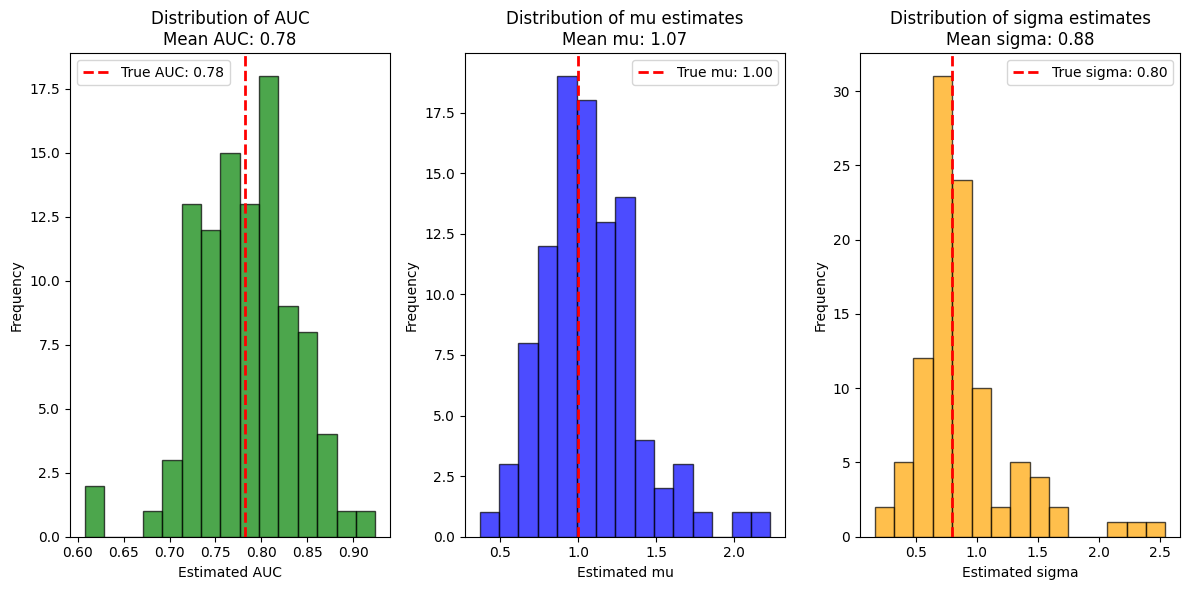

In [159]:
auc_estimates = np.array(auc_estimates)
mu_estimates = np.array(mu_estimates)
sigma_estimates = np.array(sigma_estimates)

auc = auc_calculate(mu, sigma)
# Plot the distributions of AUC, mu, and sigma estimates
plt.figure(figsize=(12, 6))

# Plot AUC distribution
plt.subplot(1, 3, 1)
plt.hist(auc_estimates, bins=15, alpha=0.7, color='green', edgecolor='black')
plt.title(f'Distribution of AUC\nMean AUC: {np.mean(auc_estimates):.2f}')
plt.axvline(auc, color='red', linestyle='dashed', linewidth=2, label=f'True AUC: {auc:.2f}')
plt.xlabel('Estimated AUC')
plt.ylabel('Frequency')
plt.legend()

# Plot mu estimates distribution
plt.subplot(1, 3, 2)
plt.hist(mu_estimates, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title(f'Distribution of mu estimates\nMean mu: {np.mean(mu_estimates):.2f}')
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2, label=f'True mu: {mu:.2f}')
plt.xlabel('Estimated mu')
plt.ylabel('Frequency')
plt.legend()

# Plot sigma estimates distribution
plt.subplot(1, 3, 3)
plt.hist(sigma_estimates, bins=15, alpha=0.7, color='orange', edgecolor='black')
plt.title(f'Distribution of sigma estimates\nMean sigma: {np.mean(sigma_estimates):.2f}')
plt.axvline(sigma, color='red', linestyle='dashed', linewidth=2, label=f'True sigma: {sigma:.2f}')
plt.xlabel('Estimated sigma')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

[[0.66466271]] [[0.90380467]]
[[0.77418682]]
